In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


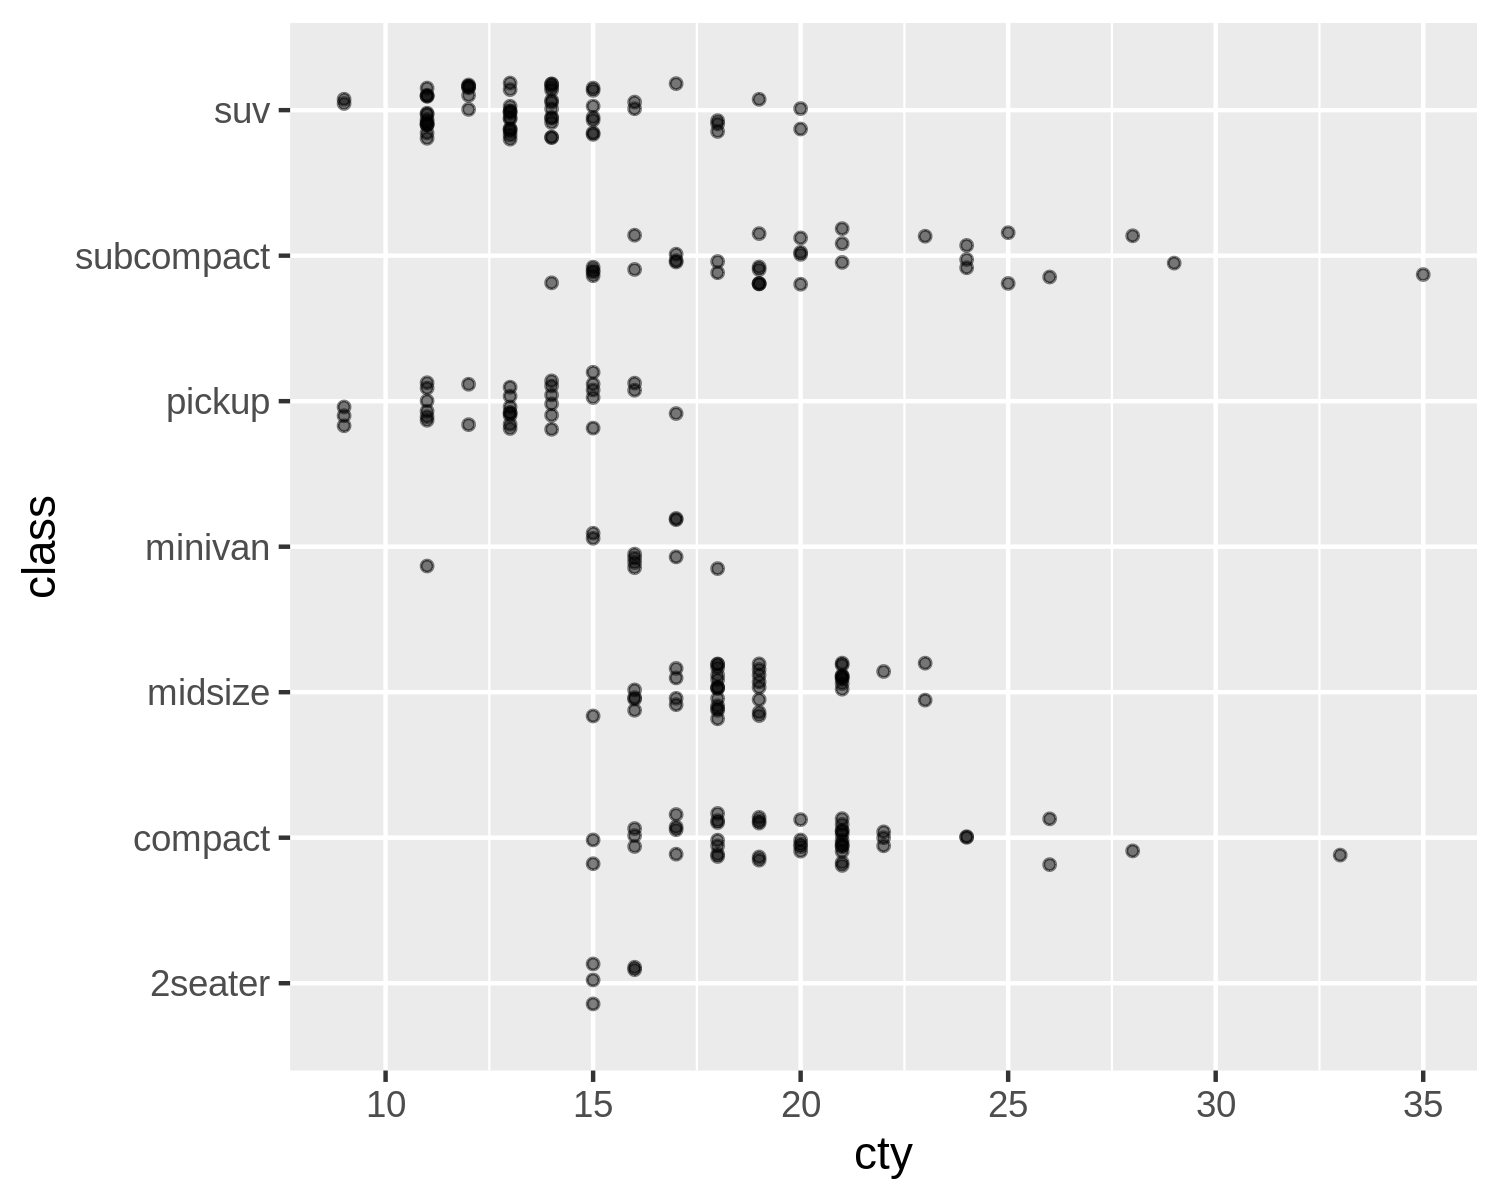

In [8]:
p = ggplot(mpg, aes(x = cty, y = class))
p = p + geom_point(size = 1, position = position_jitter(w=0, h=0.2), alpha=0.5)
p

In [23]:
median = mpg %>%
    group_by(class) %>%
    summarize(cty.median = median(cty)) %>%
    arrange(cty.median) %>%
    mutate(class = fct_inorder(class))#fct_reorder(class, cty, max)

median

class,cty.median
<fct>,<dbl>
pickup,13
suv,13
2seater,15
minivan,16
midsize,18
subcompact,19
compact,20


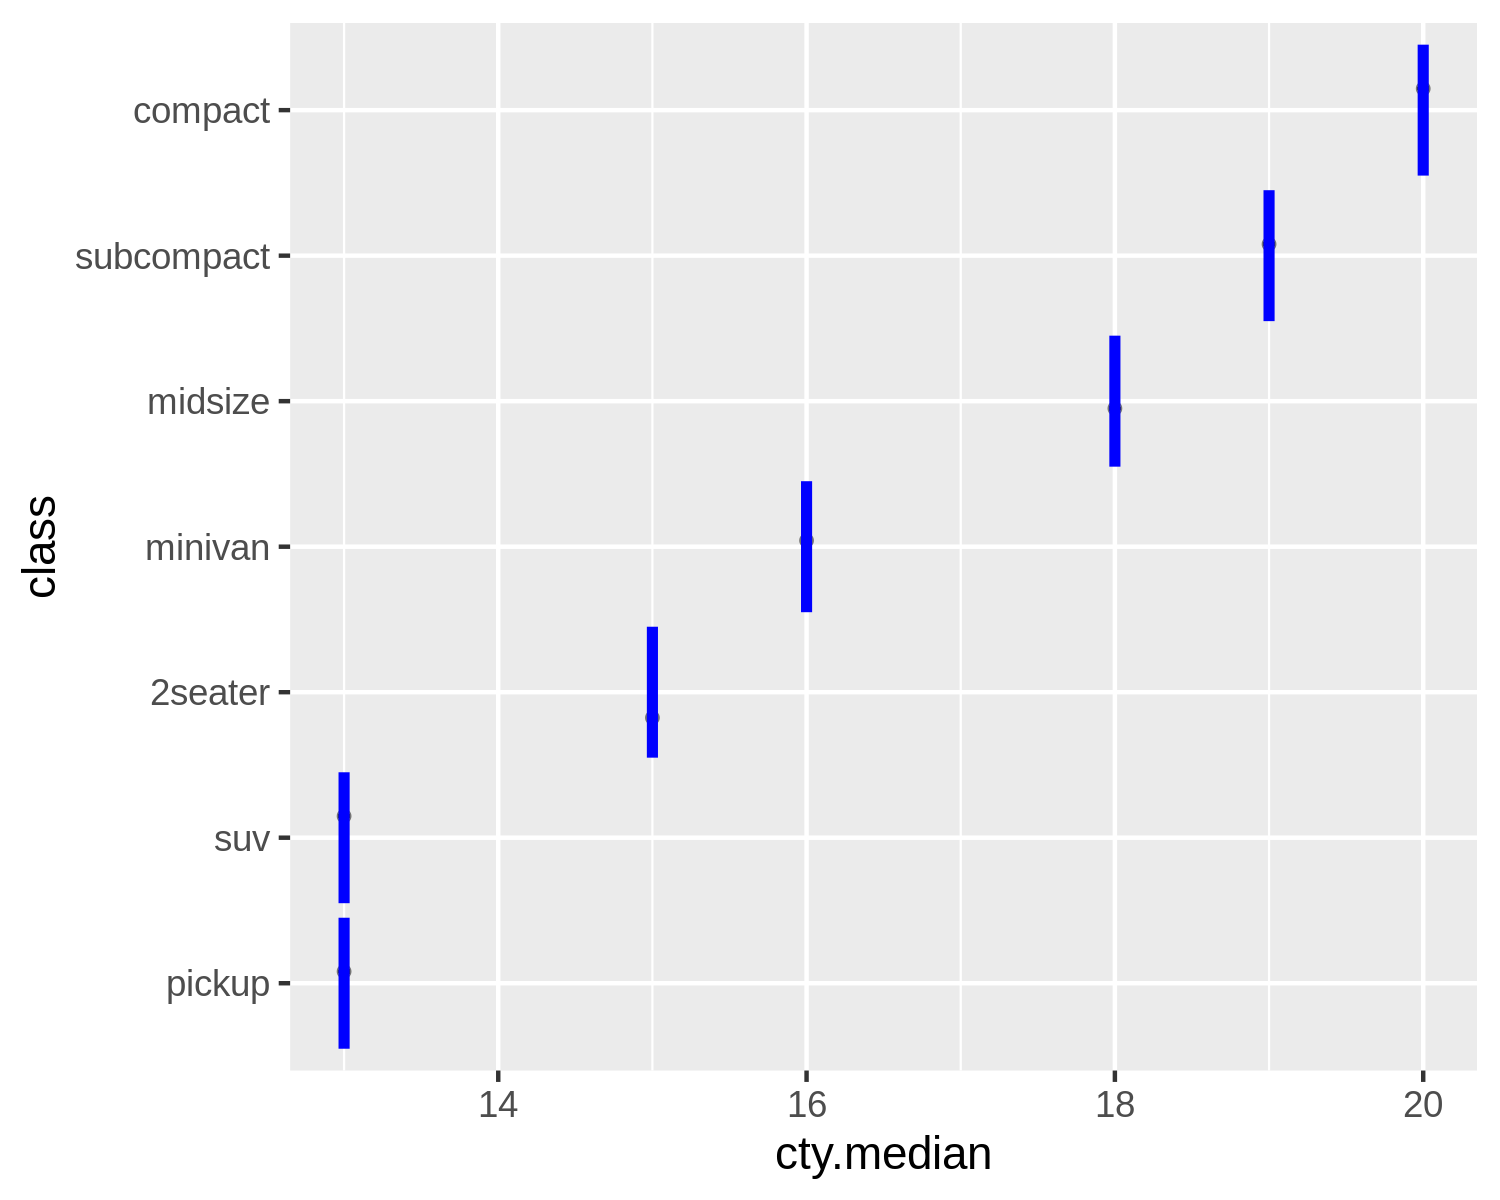

In [24]:
p = ggplot(median, aes(x = cty.median, y = class))
p = p + geom_point(size = 1, position = position_jitter(w=0, h=0.2), alpha=0.5)
p = p + geom_crossbar(xmin = 1, xmax = 1, color = 'blue')
p

Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`